In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

## Pure with both particles on boundary together

$$\rho  = \vert 0, 1 \rangle \langle 0, 1 \rangle$$

In [2]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    D = len(s.get_enumerated_states())
    all_purities.append(D*purities)
pure_purities = numpy.array(all_purities)

CPU times: user 9min 9s, sys: 12.5 s, total: 9min 22s
Wall time: 28.9 s


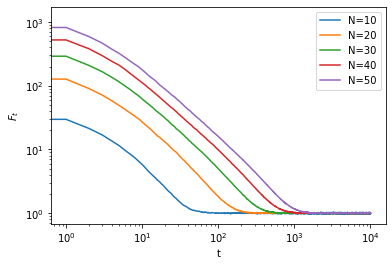

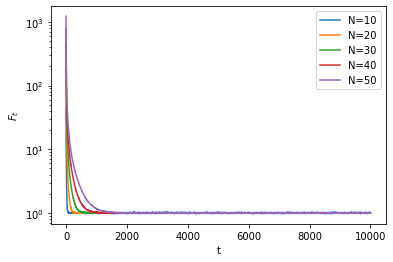

In [3]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure with both particles on boundary at opposite ends

$$ \rho = \vert 0, (N-1) \rangle \langle 0, (N-1) \vert $$

In [4]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    s = py_entropy.MultiDefectState([[0,n-1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    D = len(s.get_enumerated_states())
    all_purities.append(D*purities)
pure_purities = numpy.array(all_purities)

CPU times: user 9min 5s, sys: 11.8 s, total: 9min 16s
Wall time: 28.5 s


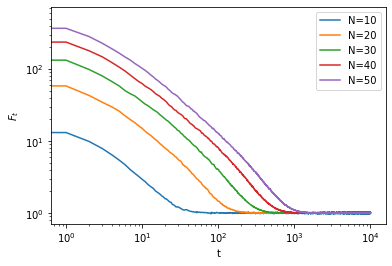

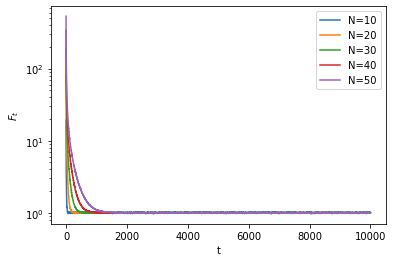

In [5]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Pure uniformly delocalized pair

$$ \rho = \frac{1}{D}\left( \sum_{a<b} \vert a, b \rangle \right)\left( \sum_{a<b} \langle a, b \vert \right) $$

In [6]:
%%time

k = 10000
ne = 1000
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    amplitudes = numpy.ones((len(input_states)), dtype=numpy.complex128) / numpy.sqrt(D)
    s = py_entropy.MultiDefectState(input_states, amplitudes, n, 2, num_experiments=ne, skip_float_checks=True)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(D*purities)
pure_purities = numpy.array(all_purities)

CPU times: user 9min 5s, sys: 12.2 s, total: 9min 17s
Wall time: 28.5 s


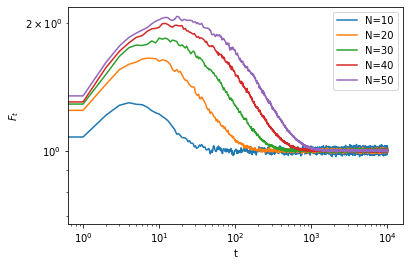

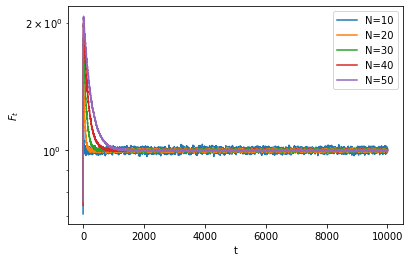

In [7]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

## Mixed with delocalized pair

$$ \rho =  \frac{1}{D} \sum_{a<b} \vert a,b \rangle \langle a,b \vert $$

In [10]:
%%time

k = 100
ne = 100
ns = 10*numpy.arange(1,6)

all_purities = []
for n in ns:
    input_states = []
    for i in range(n):
        for j in range(i+1,n):
            input_states.append([i,j])
    D = len(input_states)
    input_states = numpy.asarray(input_states, dtype=numpy.uint64)
    input_states = numpy.expand_dims(input_states, axis=1)
    probs = numpy.ones((D,)) / D
    amplitudes = numpy.ones((D, 1), dtype=numpy.complex128)
    
    s = py_entropy.MultiDefectState.new_mixed(input_states, probs, amplitudes, n, 2, 
                                              num_experiments=ne, skip_float_checks=True)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    all_purities.append(D*purities)
pure_purities = numpy.array(all_purities)

CPU times: user 1h 36min 8s, sys: 20.2 s, total: 1h 36min 28s
Wall time: 5min 11s


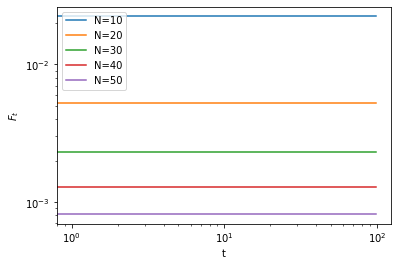

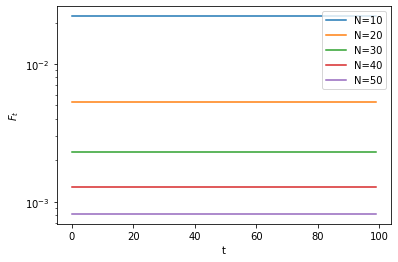

In [11]:
for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for n, purity in zip(ns, pure_purities):
    pyplot.plot(purity, label=f"N={n}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()